# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10
print('natavil sem 10 vrstic')
# izberemo interaktivni "notebook" stil risanja
#plotly je druga moznost
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
print('uvozil sem os.path')
pot_do_podatkov = os.path.join("../../", "02-zajem-podatkov", "predavanja", "obdelani-podatki", "filmi.csv")

filmi = pd.read_csv(pot_do_podatkov)

natavil sem 10 vrstic
uvozil sem os.path


Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values(['ocena', 'leto'], ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
2734,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2293163,28341469.0,R,Two imprisoned men bond over a number of years...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
9815,7738784,Peranbu,147,2018,9.0,NaN,11866,NaN,NaN,"A single father tries to raise his daughter, w..."
...,...,...,...,...,...,...,...,...,...,...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."


Poberite stolpec ocen.
(prikaz se razlikuje - ne dobimo tabele ampak seznam)

In [4]:
ocene = filmi['ocena']

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:
(z drugim načinom nam da podtabelo, s prvim pa nek seznam)

In [5]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    6.0
9997    7.0
9998    7.0
9999    7.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [7]:
filmi['zaokrozene ocene'] = zaokrozene
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr...",6.0
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...,6.0
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...,7.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom. (vrne cisto novo tabelo filmi ostanjo sevedno isti)

In [8]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr...",6.0
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...,6.0
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...,7.0


da popravimo izvorno tabelo moramo na novo definirat

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [9]:
filmi_light = filmi[['glasovi', 'naslov', 'leto']].copy()
filmi_light['zaokrozena ocena'] = zaokrozene
filmi_light

,glasovi,naslov,leto,zaokrozena ocena
0,22363,The Birth of a Nation,1915,6.0
1,13970,Intolerance: Love's Struggle Throughout the Ages,1916,8.0
2,9296,Broken Blossoms or The Yellow Man and the Girl,1919,7.0
3,56089,Das Cabinet des Dr. Caligari,1920,8.0
4,110278,The Kid,1921,8.0
...,...,...,...,...
9995,10414,A Fall from Grace,2020,6.0
9996,8285,Sputnik,2020,6.0
9997,8381,Bulbbul,2020,7.0
9998,12232,Raat Akeli Hai,2020,7.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

.head pokaze prvih nekaj, .tail pa zadnjih nekaj

In [10]:
prej_mask = filmi['leto'] < 1930
potem_mask = filmi['leto'] > 2017
filmi[prej_mask | potem_mask].head(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
6501,1137450,Zelja po mascevanju,107,2018,6.4,31.0,62137,34017028.0,R,Dr. Paul Kersey is an experienced trauma surge...,6.0
6637,1206885,Rambo: Last Blood,89,2019,6.1,26.0,78077,18872919.0,R,Rambo must confront his past and unearth his r...,6.0
6650,1213641,First Man,141,2018,7.3,84.0,162064,44936545.0,PG-13,"A look at the life of the astronaut, Neil Arms...",7.0
6687,1226837,Lepi fant,120,2018,7.3,62.0,49521,7649973.0,R,Based on the best-selling pair of memoirs from...,7.0


In [11]:
filmi.head(250).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
200,38109,Uročen,111,1945,7.6,NaN,42664,7000000.0,NaN,A psychiatrist protects the identity of an amn...,8.0
201,38166,Trije kavalirji,71,1944,6.4,85.0,12080,NaN,NaN,"Donald receives his birthday gifts, which incl...",6.0
202,38348,La belle et la bête,96,1946,7.9,92.0,23829,298718.0,NaN,A beautiful young woman takes her father's pla...,8.0
203,38355,Globoko spanje,114,1946,7.9,NaN,77800,6540000.0,NaN,Private detective Philip Marlowe is hired by a...,8.0
204,38499,Duel in the Sun,129,1946,6.8,NaN,7884,20408163.0,NaN,Beautiful half-breed Pearl Chavez becomes the ...,7.0
...,...,...,...,...,...,...,...,...,...,...,...
245,40662,Oliver Twist,116,1948,7.8,84.0,11095,NaN,NaN,"In Charles Dickens' classic tale, an orphan we...",8.0
246,40724,Red River,133,1948,7.8,NaN,27630,NaN,NaN,"Dunson leads a cattle drive, the culmination o...",8.0
247,40725,Rdeči čeveljčki,135,1948,8.1,NaN,30183,10900000.0,NaN,A young ballet dancer is torn between the man ...,8.0
248,40746,Vrv,80,1948,8.0,73.0,126925,NaN,NaN,Two men attempt to prove they committed the pe...,8.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [12]:
def je_kratek_naslov(naslov, max_besed=2):
    return len(naslov.split()) <= max_besed
    
dobra_ocena = filmi['ocena'] > 8
kratki_naslovi = filmi['naslov'].apply(je_kratek_naslov)

filmi[dobra_ocena & kratki_naslovi]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
11,15324,Sherlock Jr.,45,1924,8.2,NaN,40303,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
13,15864,Zlata mrzlica,95,1925,8.2,NaN,98472,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
14,15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9898,8579674,1917,119,2019,8.3,78.0,375975,159227644.0,R,"April 6th, 1917. As a regiment assembles to wa...",8.0
9934,9052870,Chhichhore,143,2019,8.2,NaN,30459,898575.0,NaN,"A tragic incident forces Anirudh, a middle-age...",8.0
9957,9477520,Asuran,141,2019,8.5,NaN,8974,NaN,NaN,The teenage son of a farmer from an underprivi...,8.0
9971,9900782,Kaithi,145,2019,8.5,NaN,8741,NaN,NaN,A recently released prisoner becomes involved ...,8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [13]:
filmi['zaokrozena ocena'] = zaokrozene
po_ocenah = filmi.groupby('zaokrozena ocena').size()

po_ocenah

zaokrozena ocena
1.0       5
2.0      40
3.0      56
4.0     221
5.0     829
6.0    3220
7.0    3534
8.0    2029
9.0      66
dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='zaokrozena ocena'>

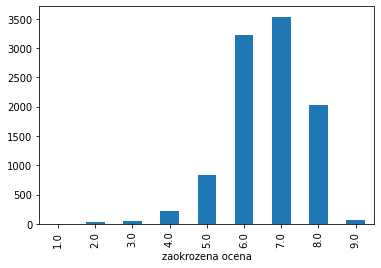

In [14]:
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<AxesSubplot:>

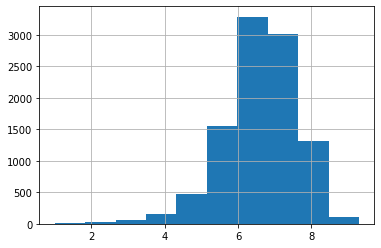

In [15]:
filmi['ocena'].hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

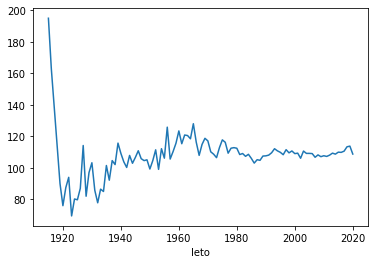

In [16]:
po_letu = filmi.groupby('leto')
povprecja_po_letu = po_letu.mean()
povprecna_dolzina = povprecja_po_letu['dolzina']
povprecna_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

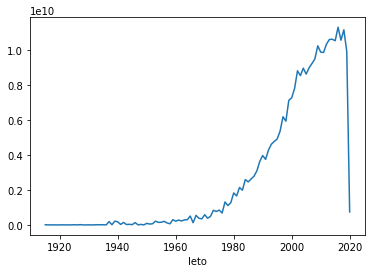

In [17]:
po_letu.sum()['zasluzek'].plot()